## 1. load 'iris_data.csv' into a dataframe

In [211]:
import pandas as pd
import numpy as np
iris = pd.read_excel(r'iris_data.xlsx')
iris

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,I. virginica
146,6.3,2.5,5.0,1.9,I. virginica
147,6.5,3.0,5.2,2.0,I. virginica
148,6.2,3.4,5.4,2.3,I. virginica


## 2. get unique labels (Species column)

In [111]:
# One-hot encoding of 'Embarked' with pd.get_dummies
iris = pd.get_dummies(iris,columns=['Species'])

In [70]:
Labels_unique = np.unique(iris_data['Species'])
Labels_unique

array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

## 3. plot with a scatter plot each iris flower sample colored by label (3 different colors)

Text(0.5, 1.0, 'iris_scatter')

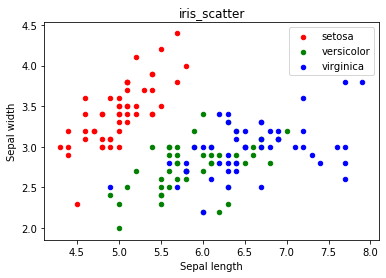

In [74]:
ax = iris[iris.Species=='I. setosa'].plot.scatter(x='Sepal length', y='Sepal width', 
                                                    color='red', label='setosa')
iris[iris.Species=='I. versicolor'].plot.scatter(x='Sepal length', y='Sepal width', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='I. virginica'].plot.scatter(x='Sepal length', y='Sepal width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("iris_scatter")


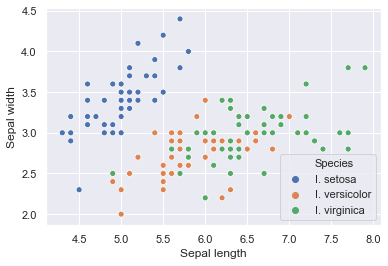

In [93]:
import seaborn as sns
sns.set()
#sns.pairplot(iris[['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']],
#             hue="Species")
sns.scatterplot(x="Sepal length", y="Sepal width", data=iris, hue="Species")


## 4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result

In [212]:
from sklearn import preprocessing
# Convert gender to 0 or 1
label_enc =preprocessing.LabelEncoder()
iris['Species'] = label_enc.fit_transform(iris['Species'].astype(str))

In [213]:
# One-hot encoding of 'Species' with pd.get_dummies
iris = pd.get_dummies(iris,columns=['Species'])

In [214]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(iris, quantile=0.2)

0.9828076649294603

In [215]:
from sklearn.cluster import MeanShift
analyzer = MeanShift(bandwidth=0.9) 
analyzer.fit(iris)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [216]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# The bandwidth is the distance/size scale of the kernel function, i.e. 
# sklearn.cluster module offers an estimate_bandwith() function based on a nearest-neighbor analysis.
# quantile should be between [0, 1] 0.5 means that the median of all pairwise distances is used

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels.reshape(1,-1), cluster_centers.reshape(1,-1), n_clusters

## 5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function

In [217]:
new_iris = mean_shift(iris)
new_iris

Number of estimated clusters : 3


(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]],
       dtype=int64),
 array([[4.98510638, 3.41914894, 1.47021277, 0.24255319, 1.        ,
         0.        , 0.        , 5.95813953, 2.79069767, 4.30930233,
         1.33953488, 0.        , 1.        , 0.        , 6.37567568,
         2.95945946, 5.36216216, 2.04324324, 0.        , 0.        ,
         1.        ]]),
 3)

## 6. create a new scatter plot where each flower is colored according to cluster label

In [207]:
from itertools import cycle

labels, cluster_centers, n_clusters = mean_shift(new_iris)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = new_iris[my_members,0], new_iris[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]],
      dtype=int64)
 array([[4.98510638, 3.41914894, 1.47021277, 0.24255319, 1.        ,
        0.        , 0.        , 5.95813953, 2.79069767, 4.30930233,
        1.33953488, 0.        , 1.        , 0.        , 6.37567568,
        2.95945946, 5.36216216, 2.04324324, 0.        , 0.        ,
        1.        ]])
 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.